In [1]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
dataset = 'data'
data_dir =os.listdir(dataset)
img_rows,img_cols = 112,112
images = []
labels = []

for category in data_dir:
    folder_path = os.path.join(dataset,category)
    print(folder_path)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path,img)
        img = cv2.imread(img_path)
        
        try :
            gary_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            resized = cv2.resize(gary_img,(img_rows,img_cols))
            images.append(resized)
            labels.append(category)
        except Exception as e:
            print(e)
images = np.array(images)/255.0
images = np.reshape(images,(images.shape[0],img_rows,img_cols,1))

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)
(X_train, X_test, y_train, y_test) = train_test_split(images,labels, test_size=0.25,random_state=0)

data\without_mask
data\with_mask


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation,Dropout,MaxPooling2D,Conv2D

In [34]:
num_classes = 2
batch_size = 32
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) 
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [ ]:
from tensorflow.keras.optimizers import Adam
epochs = 30
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

fitted_model = model.fit(X_train,y_train,epochs=epochs,validation_split=0.25)

Epoch 1/30


In [153]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
losses = pd.DataFrame(fitted_model.history)

In [166]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.614764,0.654484,0.450854,0.795130
1,0.390394,0.830332,0.352305,0.854420
2,0.269571,0.892126,0.301825,0.875596
3,0.187824,0.925494,0.320983,0.870831
4,0.136889,0.947210,0.296300,0.884066


<AxesSubplot:>

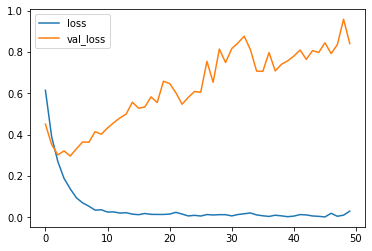

In [164]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

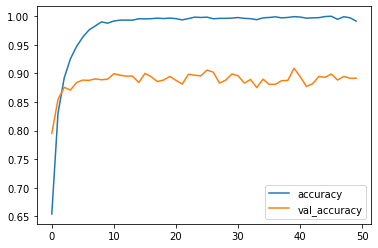

In [165]:
losses[['accuracy','val_accuracy']].plot()

In [17]:
model.save('face_mask_detection_alert_system.h5')

In [28]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import tkinter
from tkinter import messagebox
import smtplib

In [29]:
root = tkinter.Tk()


In [30]:
model = load_model('face_mask_detection_alert_system.h5')
face_detection_classifer = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

webcom_videos_stream  = cv2.VideoCapture(0)
text_dict = {0:'Mask ON',1:'No Mask'}
rect_color_dict={0:(0,255,0),1:(0,0,255)}
while(True):
    ret,img  = webcom_videos_stream.read()
    grey_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    fases    = face_detection_classifer.detectMultiScale(grey_img,1.3,5)
    for (x,y,w,h) in fases:
        face_img       = grey_img[y:y+w,x:x+w]
        resized_img    = cv2.resize(face_img,(112,112))
        normalized_img = resized_img/255.0
        reshape_img    = np.reshape(normalized_img,(1,112,112,1))
        result         = model.predict(reshape_img)
        
        
        label          = np.argmax(result,axis=1)[0]
        
        cv2.rectangle(img,(x,y),(x+w,y+h),rect_color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),rect_color_dict[label],-1)
        cv2.putText(img,text_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,0),2)

    cv2.imshow('Live Videos',img) 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
             
webcom_videos_stream.release() 
cv2.destroyAllWindows()
        